<a href="https://colab.research.google.com/github/sabareesh14/Car-Prediction/blob/main/carpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data.csv")

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [ ]:
df.shape

(8128, 12)

In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [ ]:
df.nunique()

,0
name,2058
year,29
selling_price,677
km_driven,921
fuel,4
seller_type,3
transmission,2
owner,5
mileage(km/ltr/kg),381
engine,121


In [ ]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


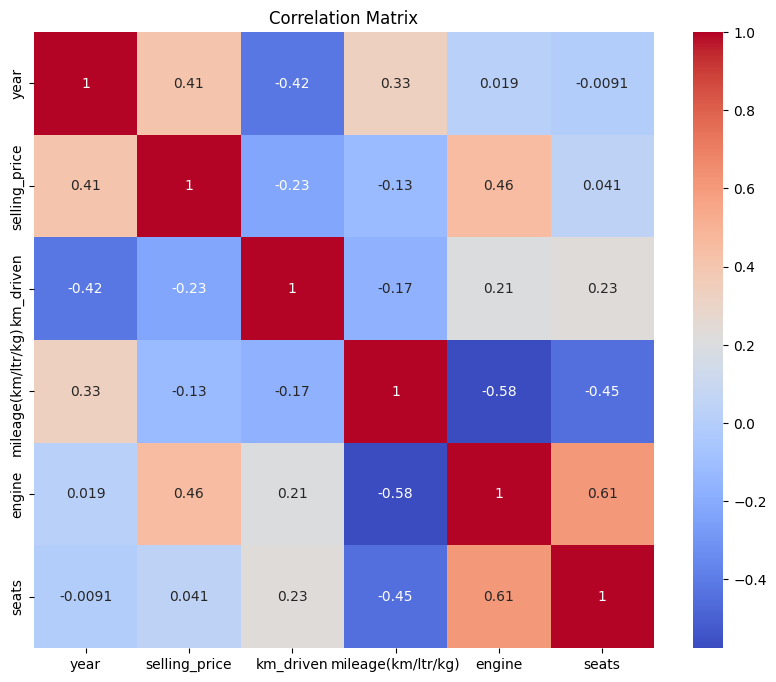

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
df_corr = df_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [ ]:
columns_to_remove = ['owner','seats'] # Update this list with actual column names to remove if needed
df = df.drop(columns=columns_to_remove, errors='ignore')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage(km/ltr/kg),engine,max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,23.40,1248.0,74
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,17.70,1497.0,78
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,23.00,1396.0,90
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,16.10,1298.0,88.2


In [ ]:
import scipy.stats as stats
import numpy as np

# select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

z_scores = stats.zscore(numeric_df, nan_policy='omit')
threshold = 3

print("Size before removing outliers:", df.shape)

# rows having any z-score greater than threshold
outliers_df = df[(np.abs(z_scores) > threshold).any(axis=1)]

# remove outliers
df = df[(np.abs(z_scores) <= threshold).all(axis=1)]

print("Size after removing outliers:", df.shape)


Size before removing outliers: (8128, 10)
Size after removing outliers: (7480, 10)


In [ ]:
outliers_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage(km/ltr/kg),engine,max_power
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,16.10,796.0,37
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,33.44,796.0,40.3
47,Toyota Fortuner 4x4 MT,2014,1500000,77000,Diesel,Dealer,Manual,12.55,2982.0,168.5
75,Toyota Fortuner 4x4 MT,2015,1700000,78000,Diesel,Individual,Manual,12.55,2982.0,168.5
131,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,17.01,1968.0,188


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

scaler = StandardScaler()

# select numeric columns
numeric_df = df.select_dtypes(include=np.number)

# fit & transform
scaled_array = scaler.fit_transform(numeric_df)

# convert back to DataFrame
df_scaled = pd.DataFrame(
    scaled_array,
    columns=numeric_df.columns,
    index=df.index
)

print(df_scaled.head())


       year  selling_price  km_driven  mileage(km/ltr/kg)    engine
0 -0.004044      -0.194628   1.829328            0.977418 -0.374398
1 -0.004044      -0.386586   1.228854            0.393959  0.162188
2 -2.224085      -0.895277   1.699814           -0.494139  0.160041
3 -1.114064      -0.734511   1.393690            0.874151 -0.056739
4 -1.946579      -0.962462   1.228854           -0.907208 -0.267081


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X= df.drop('selling_price', axis=1)
y = df['selling_price' ]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(f"xtrain {x_train.shape}")
print(f"xtest {x_test.shape}")

xtrain (5610, 9)
xtest (1870, 9)


In [ ]:
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('KNN', KNeighborsRegressor())

]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)


In [ ]:
for name, model in models:
    print(name)
    print()
    model.fit(x_train,y_train)

    # Ensure x_test has the same columns as x_train after one-hot encoding
    # This is a common workaround when get_dummies is applied separately.
    # The ideal fix is to apply get_dummies to the full dataset X before train-test split.
    train_cols = x_train.columns
    x_test_aligned = x_test.reindex(columns=train_cols, fill_value=0)

    y_pred = model.predict(x_test_aligned)
    print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
    print('\n')
    print("Mean Absolute Error (MAE): ",mean_absolute_error(y_test, y_pred))
    print('\n')
    print("R-squared (R2)",r2_score(y_test, y_pred))
    print('\n')

Random Forest

Mean Squared Error:  11336073372.466307


Mean Absolute Error (MAE):  61916.807319146166


R-squared (R2) 0.9329146064920814


Linear Regression

Mean Squared Error:  33116223883.290127


Mean Absolute Error (MAE):  88309.1490988925


R-squared (R2) 0.8040225360482551


Decision Tree

Mean Squared Error:  20496205772.69908


Mean Absolute Error (MAE):  77900.17963458112


R-squared (R2) 0.8787061459022965


KNN

Mean Squared Error:  55508723977.482994


Mean Absolute Error (MAE):  143938.04106951872


R-squared (R2) 0.671506661186887


